In [2]:
import torch
from torchvision.models import resnet18
#from anatome import Distance

random_model = resnet18()
learned_model = resnet18(pretrained=True)
distance = Distance(random_model, learned_model, method='lincka')
with torch.no_grad():
    distance.forward(torch.randn(256, 3, 224, 224))

# resize if necessary by specifying `size`
distance.between("layer3.0.conv1", "layer3.0.conv1", size=8)

/opt/mambaforge/envs/landing/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/opt/mambaforge/envs/landing/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


NameError: name 'Distance' is not defined

In [6]:
Tuple

NameError: name 'Tuple' is not defined

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 128

trainset = torchvision.datasets.CIFAR10(root='data', train=True,
                                        download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='data', train=False,
                                       download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [5]:
#model1 = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)
#model2 = torch.hub.load('pytorch/vision:v0.10.0', 'resnet34', pretrained = True)

In [10]:
n_epochs = 15
device = 'cuda'

model1 = VGG16()
model1.to(device)

optimizer1 = optim.SGD(model1.parameters(), lr=1e-1, weight_decay=5e-4)

model2 = VGG16()
model2.to(device)

optimizer2 = optim.SGD(model2.parameters(), lr=1e-1, weight_decay=5e-4)


In [11]:
def train(model, optimizer, n_epochs):
    best_test_acc = 0.
    for epoch in range(n_epochs):
        model.train()
        train_loss = 0.0
        for batch_idx, (batch_x, batch_y) in enumerate(trainloader):
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)
            logits = model(batch_x)
            loss = model.loss(logits, batch_y)
            train_loss =+ loss.item() * batch_x.size(0)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print(train_loss)

        # Test
        model.eval()
        with torch.no_grad():
            test_loss = 0.
            correct = 0.
            for batch_x, batch_y in testloader:
                batch_x, batch_y = batch_x.to(device), batch_y.to(device)
                logits = model(batch_x)
                loss = model.loss(logits, batch_y)
                test_loss += loss.item() * batch_x.size(0)
                correct += model.correct(logits, batch_y).item()
        print(100 * correct / len(testset))

In [12]:
train(model1, optimizer1, 8)
train(model2, optimizer2, 8)

146.0901927947998
37.72
98.41989517211914
53.28
64.87025260925293
68.02
41.58088207244873
76.41
36.66182041168213
71.1
33.64502668380737
75.83
32.3140287399292
80.62
20.468344688415527
76.72
20.15674114227295
79.35
4.543396532535553
83.8
16.39115333557129
75.76
12.135056257247925
80.67
34.26145553588867
75.83
19.666507244110107
80.3
10.329868793487549
75.25
151.77044868469238
34.88
109.2646598815918
46.59
57.803826332092285
66.98
61.077070236206055
54.31
58.540658950805664
69.68
48.58875751495361
71.58
35.38276195526123
73.13
42.11857795715332
74.56
22.157063484191895
80.38
16.11117720603943
79.69
15.63859224319458
82.03
31.00609302520752
75.83
5.202533006668091
82.45
4.297681450843811
80.4
11.684056520462036
77.78


In [7]:
best_test_acc = 0.
for epoch in range(n_epochs):
    model.train()
    train_loss = 0.0
    for batch_idx, (batch_x, batch_y) in enumerate(trainloader):
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)
        logits = model(batch_x)
        loss = model.loss(logits, batch_y)
        train_loss =+ loss.item() * batch_x.size(0)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(train_loss)

    # Test
    model.eval()
    with torch.no_grad():
        test_loss = 0.
        correct = 0.
        for batch_x, batch_y in testloader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)
            logits = model(batch_x)
            loss = model.loss(logits, batch_y)
            test_loss += loss.item() * batch_x.size(0)
            correct += model.correct(logits, batch_y).item()
    print(100 * correct / len(testset))


142.44824409484863
29.33
72.21125602722168
59.78
50.928659439086914
71.39
32.691588401794434
79.32
36.200642585754395
76.58
39.643661975860596
73.61
27.06418752670288
80.48
15.096169710159302
79.73
27.089715003967285
80.97
26.10924482345581
77.8
11.494476795196533
81.91
15.832401514053345
79.62
8.281112909317017
77.01
3.2907339930534363
83.43
28.171651363372803
74.79


In [18]:
trainloader_enum = enumerate(trainloader)

In [33]:
i, (batch_x, batch_y) = trainloader_enum.__next__()
batch_x, batch_y = batch_x.to(device), batch_y.to(device)

In [63]:
A1 = model1.features(batch_x)[:,:,0,0]
A2 = model1.features(batch_x)[:,:,0,0]

In [68]:
(A1.T@A2).shape

torch.Size([512, 512])

In [75]:
(U, S, V) = torch.pca_lowrank(A1.T@A2, q = 100, center=True, niter=20)

In [84]:
S.cpu().detach().numpy()[:50]

array([1.0347093e+04, 5.0820493e+03, 3.5821323e+03, 2.9084653e+03,
       2.4939863e+03, 1.8302538e+03, 1.3989786e+03, 1.1476134e+03,
       8.5155157e+02, 6.2643530e+02, 2.4559721e+02, 7.1573997e+01,
       5.0670170e+01, 4.8174137e+01, 4.1952473e+01, 3.7283165e+01,
       3.6203281e+01, 3.1056530e+01, 2.5350792e+01, 2.4845078e+01,
       2.2801348e+01, 2.0585983e+01, 1.9518456e+01, 1.7976635e+01,
       1.6180603e+01, 1.5687751e+01, 1.3683533e+01, 1.2015533e+01,
       1.0651150e+01, 1.0012889e+01, 9.1580162e+00, 8.3238554e+00,
       7.8208060e+00, 7.5031281e+00, 6.8287992e+00, 6.1659822e+00,
       5.9519992e+00, 5.1096954e+00, 4.9533033e+00, 4.3717241e+00,
       4.1098890e+00, 3.8927417e+00, 3.5315640e+00, 3.5272615e+00,
       3.4553266e+00, 3.2666328e+00, 3.1249063e+00, 3.0096223e+00,
       2.7635863e+00, 2.6369815e+00], dtype=float32)

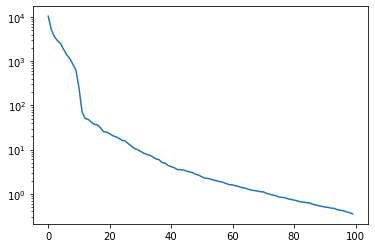

In [82]:
plt.semilogy(S.cpu().detach().numpy())

In [69]:
A1.shape

torch.Size([128, 512])

In [23]:
trainloader.batch_size

128

In [32]:
batch_x.shape

torch.Size([128, 3, 32, 32])

In [85]:
import torch
from torchvision.models import resnet18
from anatome import Distance

random_model = resnet18()
learned_model = resnet18(pretrained=True)
distance = Distance(random_model, learned_model, method='pwcca')
with torch.no_grad():
    distance.forward(torch.randn(256, 3, 224, 224))

# resize if necessary by specifying `size`
distance.between("layer3.0.conv1", "layer3.0.conv1", size=8)

TypeError: 'type' object is not subscriptable